In [1]:
##############################################################
# Final Project :
# Names: Christy Nelson and Jorge Rodriguez
# GitHub: https://github.com/jorgeerodriguez/COMP_4447
#
##############################################################

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss
%matplotlib inline

In [3]:
# read a csv file
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.sample(20)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4077,43.0,Male,PhD,Data Scientist,16.0,160000.0
5854,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0
4388,41.0,Female,Master's Degree,Marketing Coordinator,13.0,131000.0
4684,26.0,Female,Bachelor's Degree,Junior Software Engineer,1.0,45000.0
692,26.0,Male,Bachelor's,Data Analyst,3.0,135000.0
3222,26.0,Male,Bachelor's Degree,Software Developer,2.0,60000.0
4952,30.0,Male,Master's Degree,Financial Manager,7.0,120000.0
1819,45.0,Male,PhD,Software Engineer Manager,16.0,185000.0
5842,25.0,Male,Bachelor's Degree,Product Manager,1.0,60000.0
1980,32.0,Female,Master's Degree,Full Stack Engineer,6.0,115000.0


In [4]:
#check the data types

salary_df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [5]:
salary_df.info()
#This shows us that there are some null entries because the non-null counts are not equal for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
#Checks to find the Nans in each column

salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
#Take a look at the rows with NaN data

nan_rows = salary_df[salary_df.isnull().T.any()]
nan_rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [8]:
#It does not seem to make any sense to replace any of these NaNs with means or anything else,
#so we will drop all rows with NaN values

salary_df.dropna(inplace=True)



In [9]:
#check that the NaNs have been dropped
salary_df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
#we can see from the sample generated that the Education Level has multiple names for the same degree
#Check:

salary_df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [11]:
#Need to group by degree and rename to streamline



salary_df["Education Level"].replace( ["Bachelor's Degree","Master's Degree",'phD'], ["Bachelor's","Master's","PhD"], inplace=True )


#Recheck:
salary_df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [12]:
#investigate Gender column

salary_df["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
#drop "Other" gender category

salary_df = salary_df[(salary_df.Gender != 'Other')]
salary_df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
#Check number of job titles
salary_df["Job Title"].nunique()

191

In [15]:
#This is a large number to investigate!  Check value counts
salary_df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       316
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [16]:
#Let's minimize the job titles we are looking that has too few represented
#By eliminating the jobs with fewer than 40 workers

job_counts = salary_df['Job Title'].value_counts()
job_list = job_counts[job_counts > 40].index.tolist()
topjob_df = salary_df[salary_df['Job Title'].isin(job_list)]

topjob_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0


In [17]:
job_list
for x in salary_df['Job Title']:
    if x not in job_list:
        salary_df['Job Title'].replace(to_replace=x,value="Others",inplace=True)
    else:
        print(x)

Software Engineer
Data Analyst
Sales Associate
Marketing Analyst
Product Manager
Sales Manager
Marketing Coordinator
Software Developer
Operations Manager
Marketing Manager
Sales Director
Financial Manager
Product Designer
Data Scientist
Director of Marketing
Sales Manager
Product Manager
Marketing Analyst
Senior Data Scientist
Digital Marketing Manager
Web Developer
Research Director
Operations Manager
Senior Software Engineer
Content Marketing Manager
Data Analyst
Marketing Coordinator
Sales Associate
Research Scientist
Junior Software Developer
Junior Web Developer
Junior HR Generalist
Sales Manager
Director of Marketing
Senior HR Generalist
Marketing Coordinator
Senior Research Scientist
Junior Sales Representative
Junior Marketing Manager
Senior Product Marketing Manager
Junior Software Developer
Senior Data Scientist
Junior Software Engineer
Senior Human Resources Manager
Senior Software Engineer
Junior Sales Representative
Junior HR Generalist
Senior Software Engineer
Director o

In [18]:
# Drop all Others in Job title
salary_df[salary_df['Job Title'] == "Others"]
salary_df.drop(salary_df[salary_df['Job Title'] == "Others"].index, inplace=True)

In [19]:
len(salary_df['Job Title'].value_counts())

44

In [20]:
#This gives us the number of jobs we are looking at

len(topjob_df['Job Title'].value_counts())



44

In [21]:
grouped = topjob_df.groupby(['Job Title','Gender'])
grouped['Salary'].agg(['mean', 'median','count'])

mean    median  count
Job Title                 Gender                                
Back end Developer        Female   91942.938462   80000.0     65
                          Male    106155.254237  100000.0    177
Content Marketing Manager Female  122244.897959   90000.0     49
                          Male    125000.000000  120000.0     24
Data Analyst              Female  114961.240310  110000.0    129
...                                         ...       ...    ...
Software Engineer         Male    118335.384615   85000.0    325
Software Engineer Manager Female  171792.900000  166652.0    100
                          Male    172759.148551  185000.0    276
Web Developer             Female   61794.871795   65000.0     39
                          Male     70208.333333   67500.0     48

[84 rows x 3 columns]

In [22]:
#sample = {'Job Title':[{'Male' :1},{'Female' : 1},{'Total': 1}]}
#print(sample['Job Title'][2]['Total'])
jt_table = {}
for x in salary_df.iterrows():
    jt = x[1]['Job Title']
    gender = x[1]['Gender']
    #print(jt, '---' , gender) 
    try:
        #jt_table[jt][2]['Total'] = jt_table[jt][2]['Total'] + 1
        jt_table[jt][2] += 1
        if gender == 'Male':
            #jt_table[jt][0]['Male'] += 1
            jt_table[jt][0] += 1
        else:
            #jt_table[jt][1]['Female'] += 1
            jt_table[jt][1] += 1
    except:
        #jt_table[jt] = [{'Male' : 0},{'Female' : 0},{'Total': 1}]
        jt_table[jt] = [0,0,1]
        if gender == 'Male':
            #jt_table[jt][0]['Male'] = 1
            jt_table[jt][0] = 1
        else:
            #jt_table[jt][1]['Female'] = 1
            jt_table[jt][1] = 1
#print(jt_table)
Percentage_df = pd.DataFrame([k, *v] for k, v in jt_table.items())
Percentage_df.columns =['Job Title', 'Male', 'Female', 'Total']
male_percentage = []
female_percentage = []
for x in Percentage_df.iterrows():
    #print(x[1]['Job Title'])
    #print(x[1]['Male'])
    male_percentage.append(x[1]['Male']/x[1]['Total']*100)
    female_percentage.append(x[1]['Female']/x[1]['Total']*100)
#male_percentage
#female_percentage
Percentage_df['Male Percentage'] = male_percentage
Percentage_df['Female Percentage'] = female_percentage
Percentage_df.set_index('Job Title', inplace=True)
Percentage_df.drop(['Male','Female','Total'], axis=1, inplace=True)
Percentage_df.sort_values(by='Job Title',ascending=True, inplace=True)
mp = sum(male_percentage)/len(male_percentage)
fp = sum(female_percentage)/len(female_percentage)
print("Male Job Percentage: ", mp, " Female Job Percentage ", fp)


Male Job Percentage:  51.08923413801536  Female Job Percentage  48.91076586198464


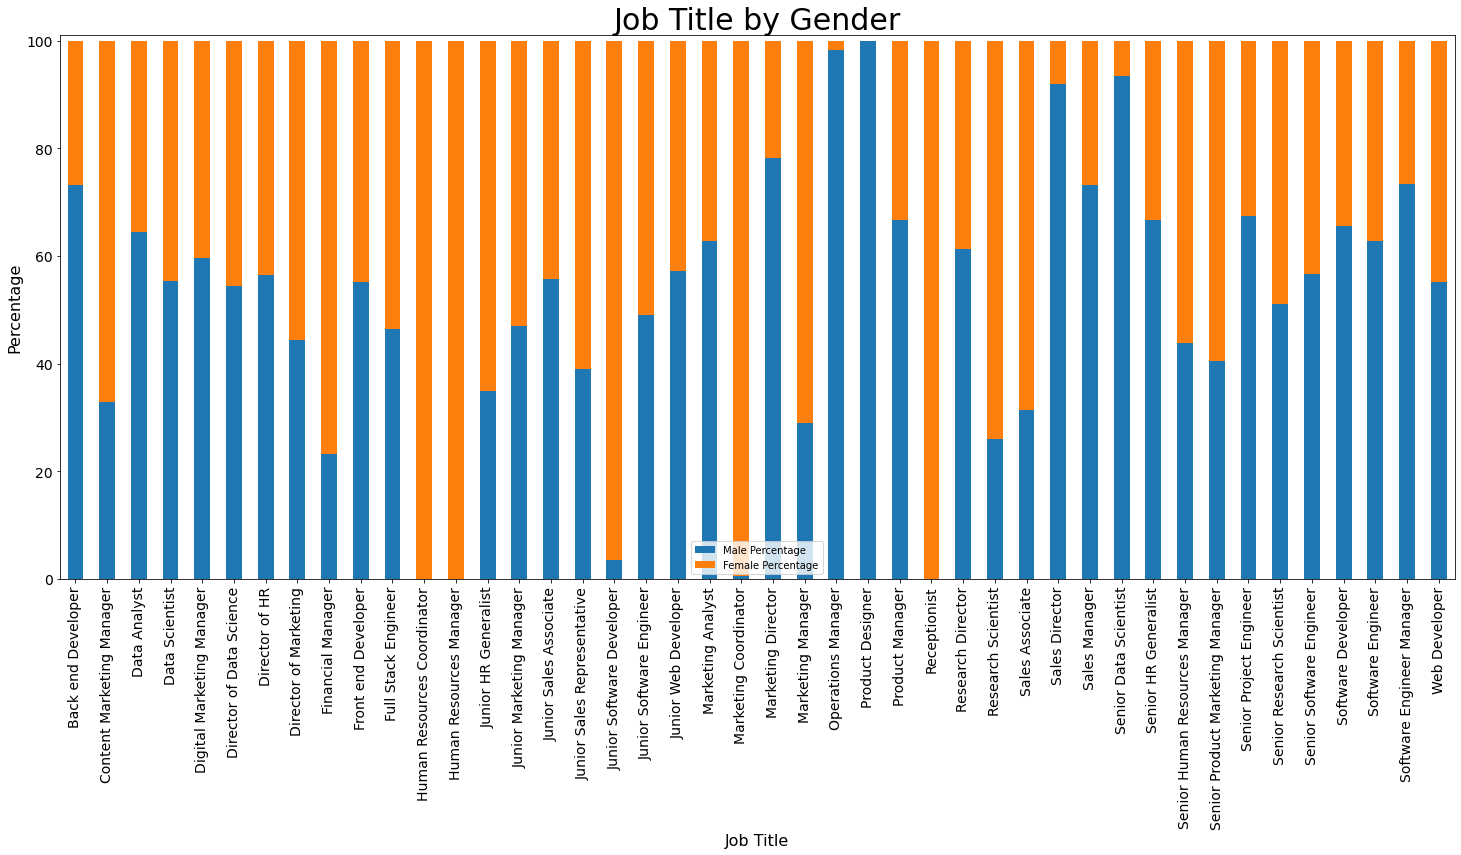

In [23]:
Percentage_df.plot(kind='bar',figsize= (25,10), stacked=True)
#plt.legend(title='Company', fontsize=20)
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Job Title', fontsize=16);
plt.ylabel('Percentage', fontsize=16);
plt.title('Job Title by Gender', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim([0,101])

plt.show()

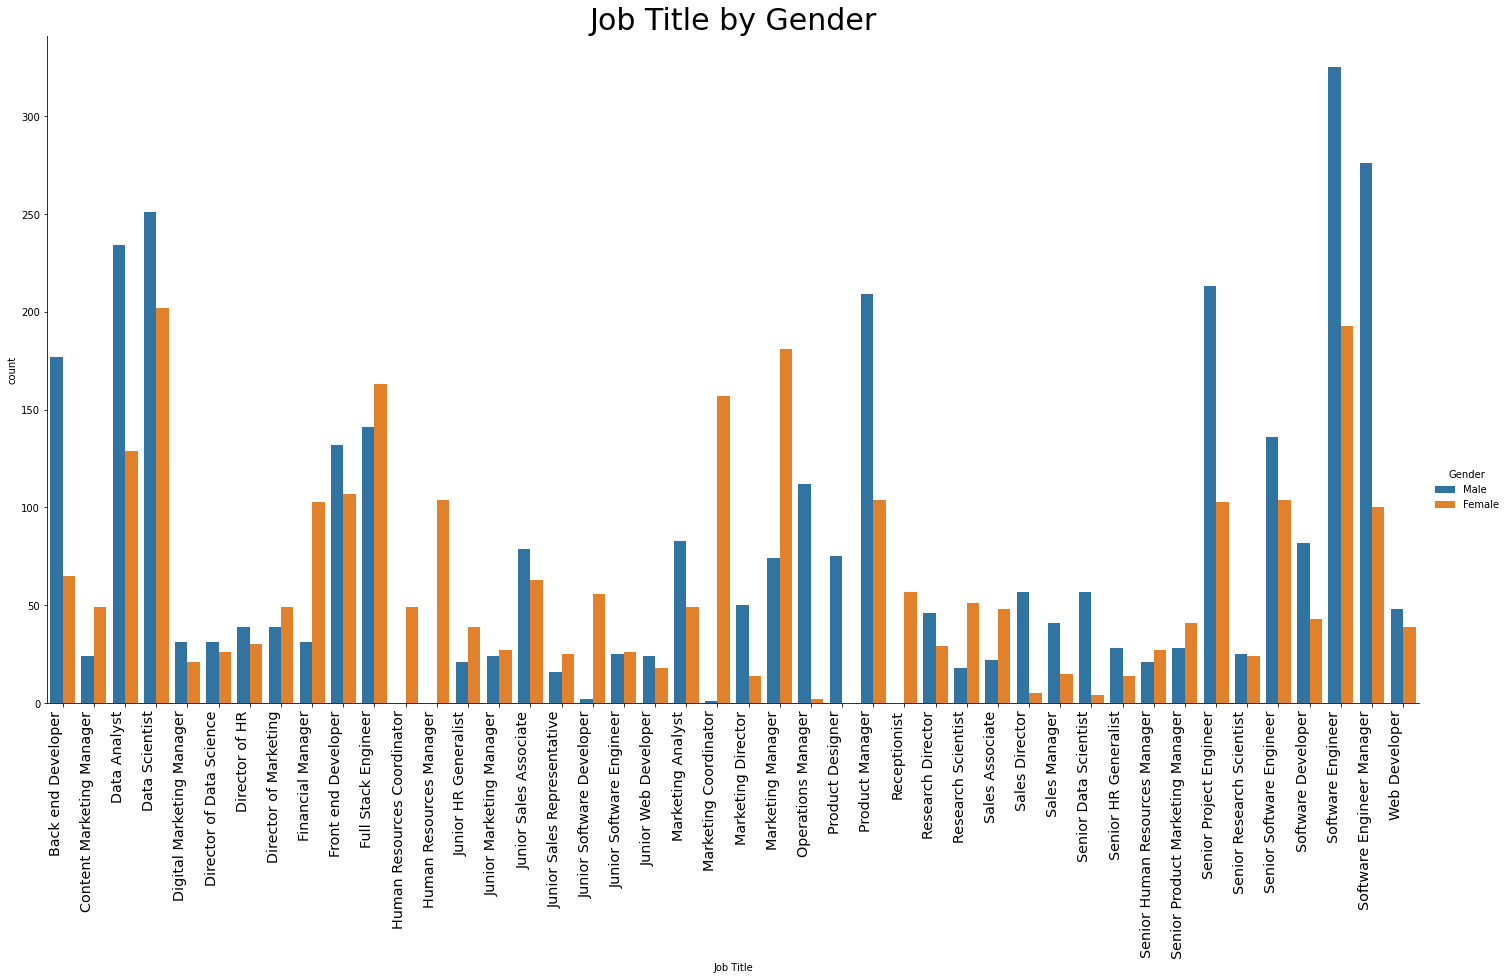

In [24]:
from  matplotlib.ticker import PercentFormatter
#sorted_data = mean_salary_by_job.sort_values(by='Gender',ascending=False)
#sns.barplot(x='Gender',y='Job Title',data=sorted_data.head(20)).set(title='Top 20 Highest paid Jobs')
ax1 = sns.catplot(data=salary_df.sort_values(by='Job Title',ascending=True),kind='count',x='Job Title',hue='Gender',height=10, aspect=2.0).set(title='Job Title by Gender')
ax1.set_xticklabels(rotation=90,horizontalalignment='right',fontweight='light',fontsize='x-large')
#plt.legend(title='Company', fontsize=20)
#plt.legend(title='Company', fontsize=20)
#plt.xlabel('Date', fontsize=16);
#plt.ylabel('Sales', fontsize=16);
plt.title('Job Title by Gender', fontsize=30)
#plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [25]:
topjob_df.groupby("Gender", as_index=True)[['Age', 'Salary', 'Years of Experience']].mean()

,Age,Salary,Years of Experience
Gender,,,
Female,32.573503,110872.977495,7.478947
Male,34.627838,125119.550777,8.830944


              Age         Salary  Years of Experience
Gender                                               
Female  32.573503  110872.977495             7.478947
Male    34.627838  125119.550777             8.830944


Text(0.5, 1.0, 'Mean Year of Experience Per Gender')

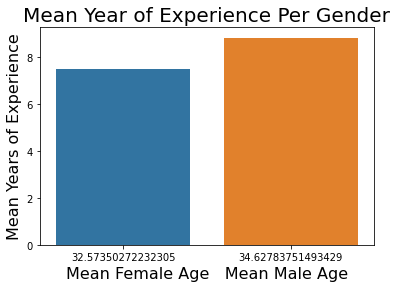

In [26]:

grouped = topjob_df.groupby("Gender", as_index=True)[['Age', 'Salary', 'Years of Experience']].mean()
print(grouped)

sns.barplot(data=grouped, x='Age', y='Years of Experience')
#ax = sns.catplot(data=grouped, kind='bar', x='Age, y='Salary',height=10, aspect=2.0)
#ax.set_xticklabels(rotation=90,horizontalalignment='right',fontweight='light',fontsize='x-large')
#plt.legend(title='Company', fontsize=20)
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Mean Female Age   Mean Male Age', fontsize=16);
plt.ylabel('Mean Years of Experience', fontsize=16);
plt.title('Mean Year of Experience Per Gender', fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=14)

              Age         Salary  Years of Experience
Gender                                               
Female  32.573503  110872.977495             7.478947
Male    34.627838  125119.550777             8.830944


Text(0.5, 1.0, 'Mean Salary Per Gender')

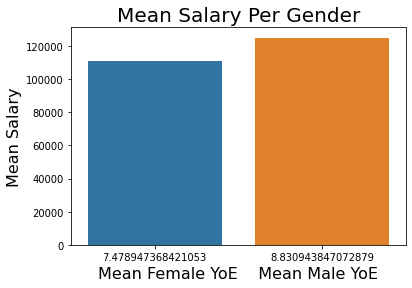

In [27]:
grouped = topjob_df.groupby("Gender", as_index=True)[['Age', 'Salary', 'Years of Experience']].mean()
print(grouped)

sns.barplot(data=grouped, y='Salary', x='Years of Experience')
#ax = sns.catplot(data=grouped, kind='bar', x='Age, y='Salary',height=10, aspect=2.0)
#ax.set_xticklabels(rotation=90,horizontalalignment='right',fontweight='light',fontsize='x-large')
#plt.legend(title='Company', fontsize=20)
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Mean Female YoE    Mean Male YoE', fontsize=16);
plt.ylabel('Mean Salary', fontsize=16);
plt.title('Mean Salary Per Gender', fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=14)

<AxesSubplot: xlabel='Education Level', ylabel='count'>

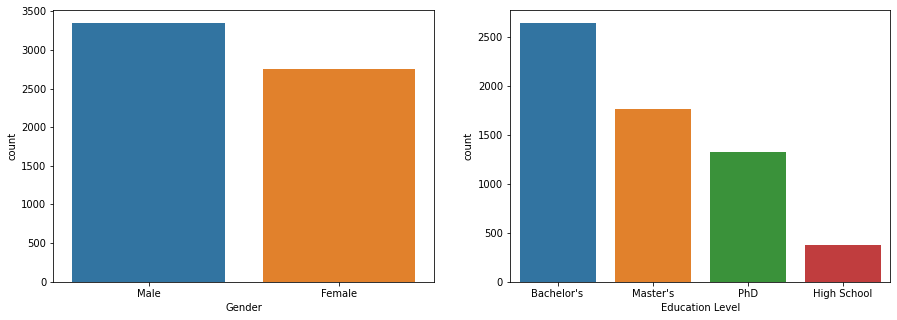

In [28]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=topjob_df,ax = ax[0])
sns.countplot(x='Education Level',data = topjob_df,ax=ax[1])


<AxesSubplot: xlabel='Education Level', ylabel='count'>

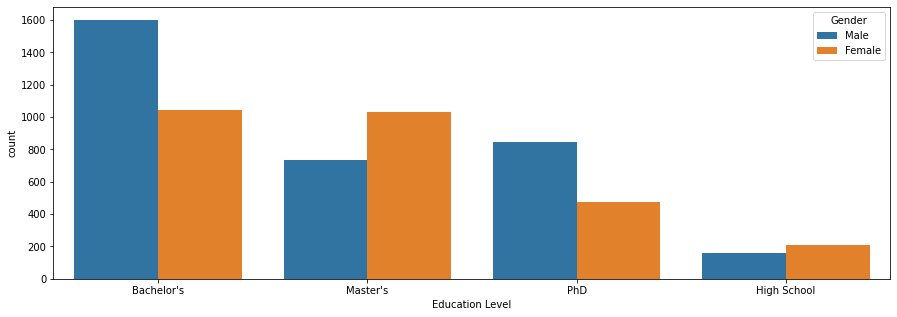

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Education Level',hue='Gender',data = salary_df,ax=ax)

In [30]:
confusion_matrix= pd.crosstab(topjob_df['Education Level'], topjob_df['Gender'])
confusion_matrix

Gender,Female,Male
Education Level,,
Bachelor's,1042,1601
High School,210,162
Master's,1030,736
PhD,473,849


In [31]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [32]:

cramers_v(confusion_matrix.values)

0.19065846425135638

In [33]:
confusion_matrix= pd.crosstab(topjob_df['Years of Experience'], topjob_df['Age'])
confusion_matrix
cramers_v(confusion_matrix.values)

0.4196879936205858

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
topjob_df["Encoded_Educ_Level"] = le.fit_transform(topjob_df['Education Level'])

topjob_df.corr()

,Age,Years of Experience,Salary,Encoded_Educ_Level
Age,1.000000,0.935564,0.726769,0.548776
Years of Experience,0.935564,1.000000,0.807643,0.545958
Salary,0.726769,0.807643,1.000000,0.510682
Encoded_Educ_Level,0.548776,0.545958,0.510682,1.000000


In [35]:
# Fit label encoder to the titles (this gives us the same result as above) :
le.fit(["Bachelor's", "High School", "Master's", "PhD"])
print(type(le.classes_))
print(le.classes_)
# # We override the label order by setting the attribute classes_:
le.classes_ = np.array(["High School", "Bachelor's", "Master's", "PhD"])
print(type(le.classes_))
print(le.classes_)
# # Now we apply the transformation using our labels:
topjob_df['Encoded_Educ_Level'] = le.transform(topjob_df['Education Level'])
topjob_df.corr()
topjob_df.sample(20)

<class 'numpy.ndarray'>
["Bachelor's" 'High School' "Master's" 'PhD']
<class 'numpy.ndarray'>
['High School' "Bachelor's" "Master's" 'PhD']


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Encoded_Educ_Level
628,30.0,Male,PhD,Data Scientist,7.0,185000.0,3
4548,25.0,Male,High School,Junior HR Generalist,2.0,40000.0,0
6057,34.0,Male,PhD,Research Director,12.0,170000.0,3
5231,29.0,Female,Bachelor's,Marketing Coordinator,4.0,65000.0,1
1729,30.0,Male,Master's,Full Stack Engineer,5.0,105000.0,2
4373,41.0,Female,Master's,Marketing Coordinator,13.0,131000.0,2
3783,27.0,Male,Bachelor's,Software Developer,3.0,60000.0,1
4056,29.0,Male,Bachelor's,Software Engineer,4.0,70000.0,1
5831,28.0,Female,Bachelor's,Marketing Analyst,3.0,60000.0,1
2240,33.0,Female,Bachelor's,Full Stack Engineer,6.0,115000.0,1


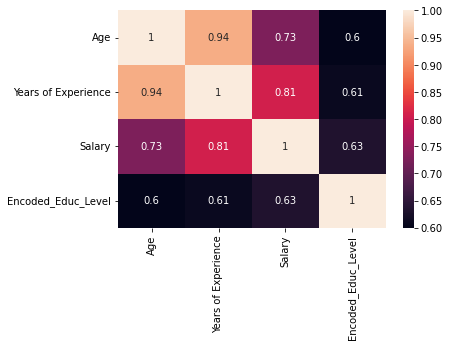

In [36]:
sns.heatmap(topjob_df.corr(), annot = True)

plt.show()

<AxesSubplot: ylabel='Salary'>

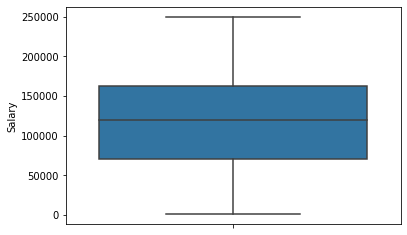

In [37]:
# Checking for outliers..... to put into sub groups....
sns.boxplot(y='Salary', data=topjob_df)

<AxesSubplot: xlabel='Education Level', ylabel='Salary'>

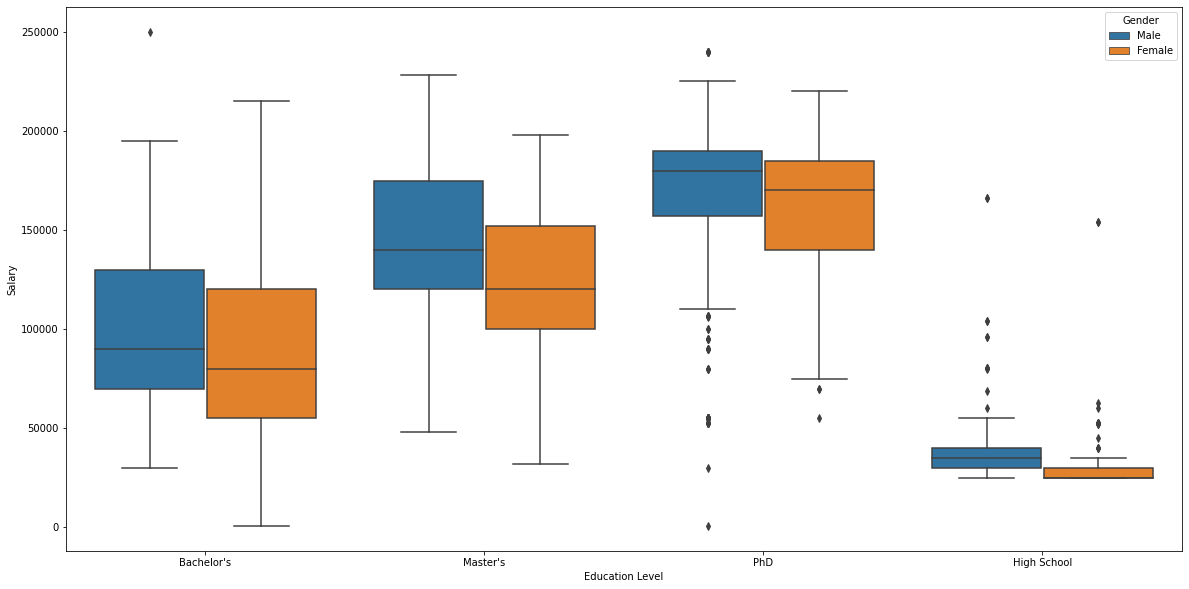

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='Education Level', y='Salary', data=topjob_df, hue = "Gender")

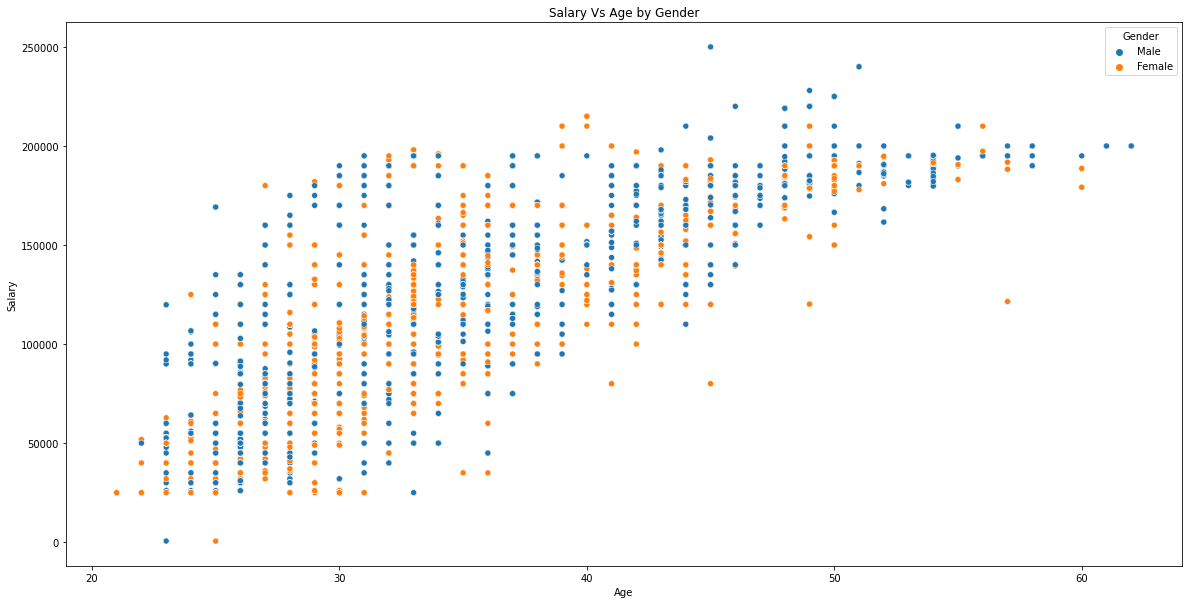

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = salary_df,x='Age', y='Salary', hue='Gender')
plt.title("Salary Vs Age by Gender");

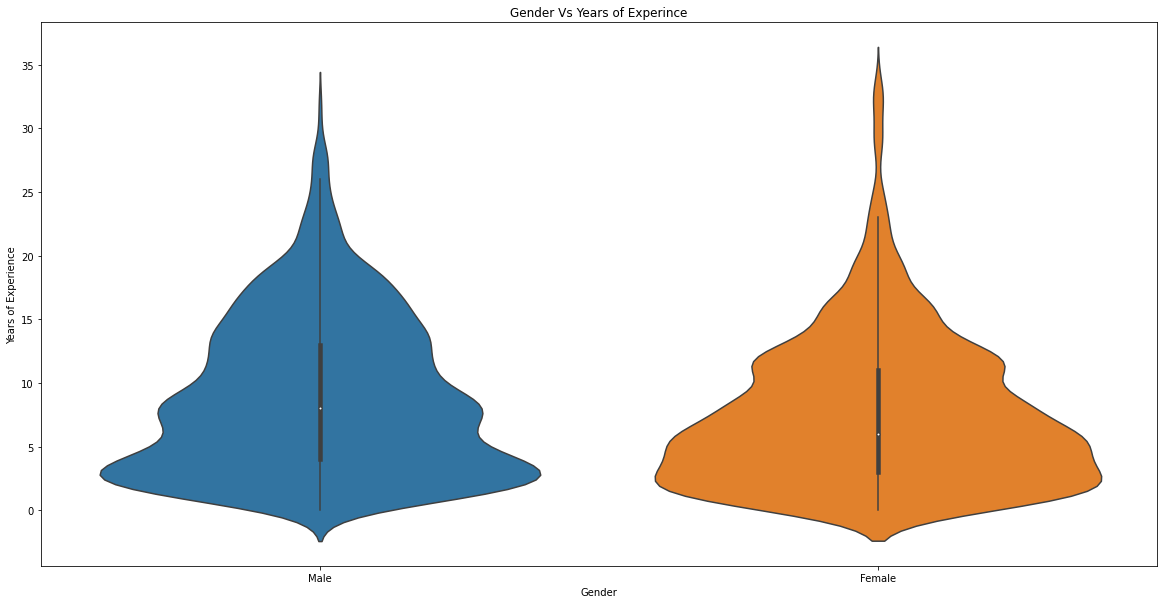

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(data = salary_df,x='Gender', y='Years of Experience')
plt.title("Gender Vs Years of Experince");

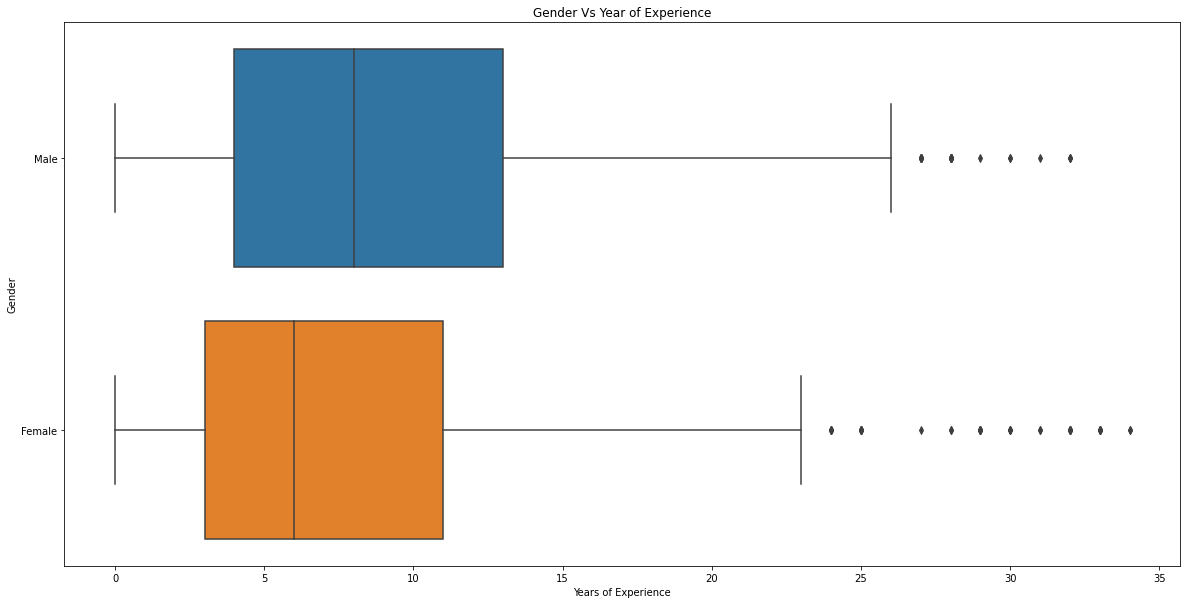

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=salary_df, y='Gender', x='Years of Experience');
plt.title("Gender Vs Year of Experience");

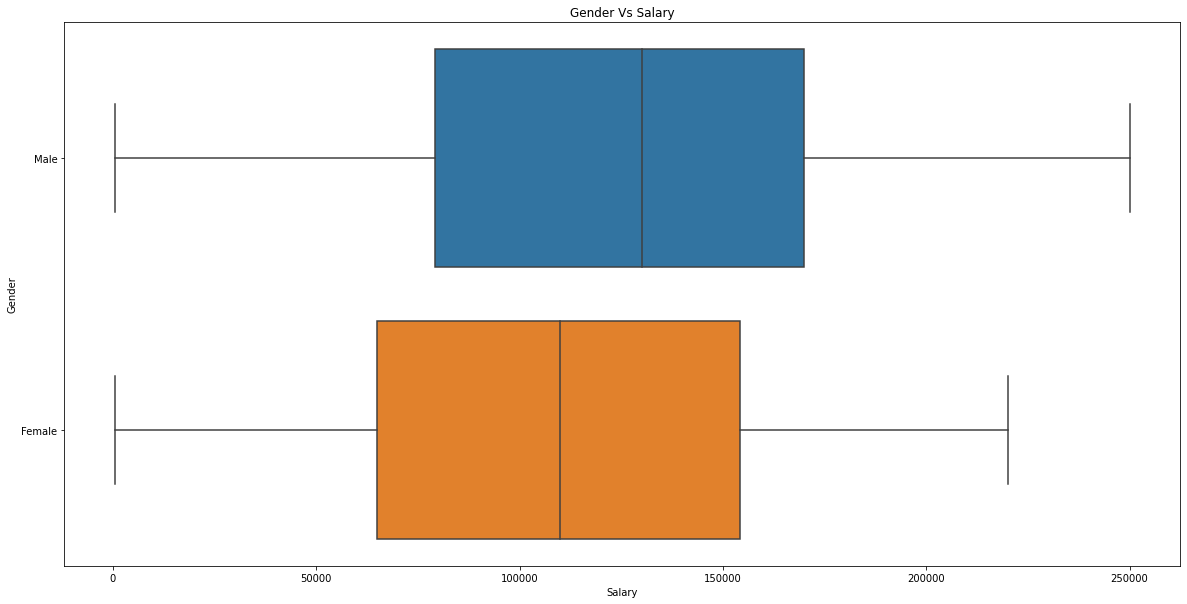

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=salary_df, y='Gender', x='Salary');
plt.title("Gender Vs Salary");

[Text(0.5, 1.0, 'Top 10 Highest paid Jobs')]

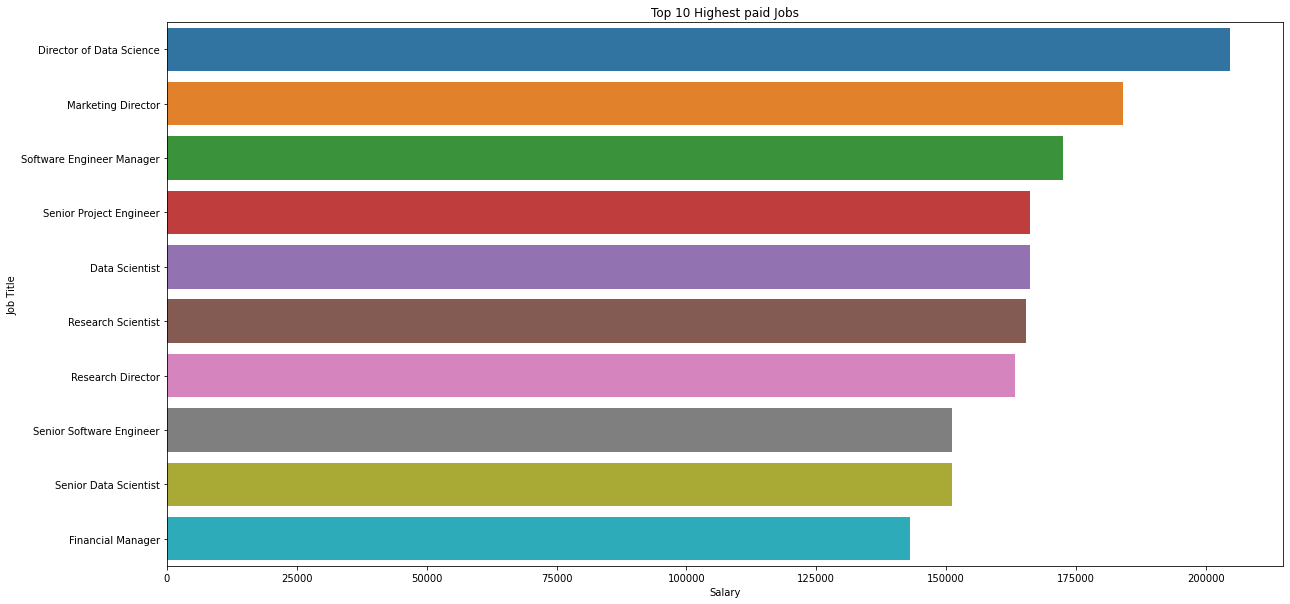

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
mean_salary_by_job = salary_df.groupby('Job Title')['Salary'].mean().reset_index()
sorted_data = mean_salary_by_job.sort_values(by='Salary',ascending=False)
sns.barplot(x='Salary',y='Job Title',data=sorted_data.head(10)).set(title='Top 10 Highest paid Jobs')

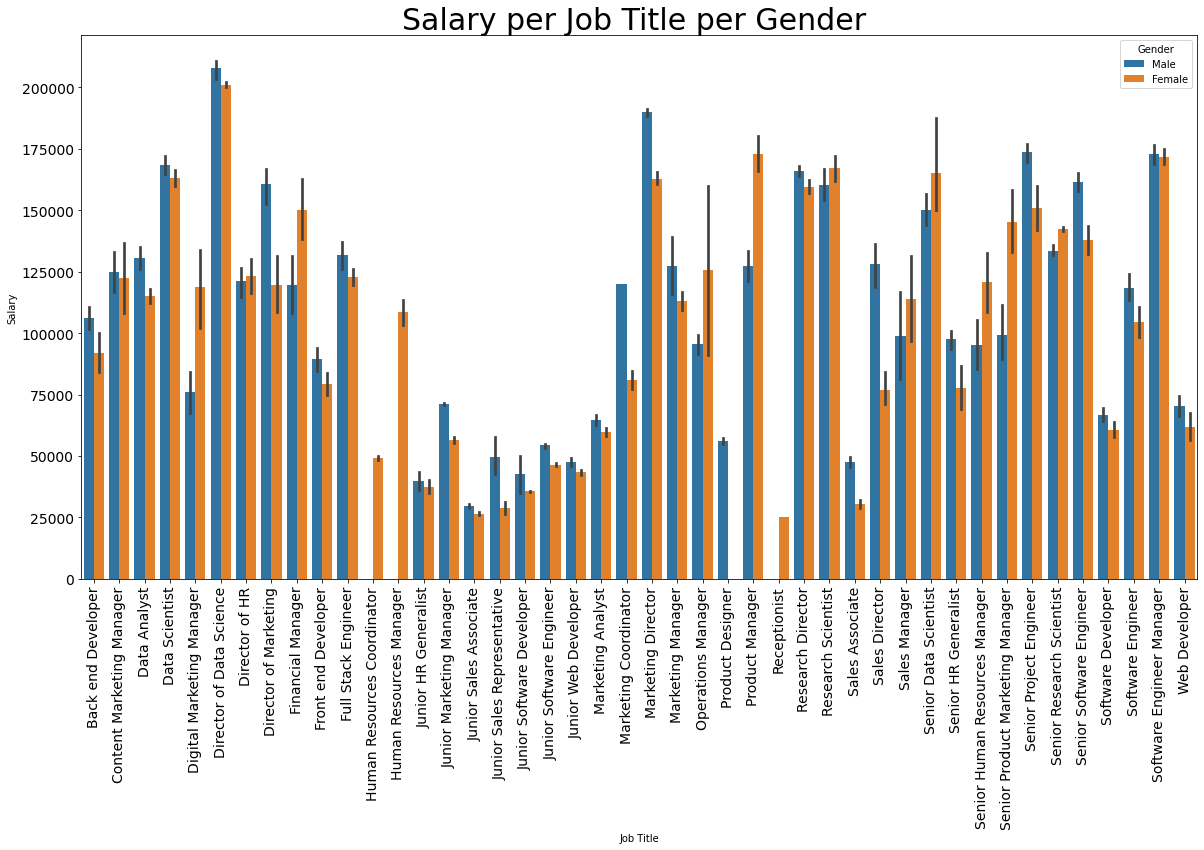

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=salary_df.sort_values(by='Job Title',ascending=True),x='Job Title', y='Salary', hue='Gender', ax=ax)
plt.xticks(rotation=90)
plt.title('Salary per Job Title per Gender ', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

[Text(0.5, 1.0, 'Education Level vs. Salary vs Gender')]

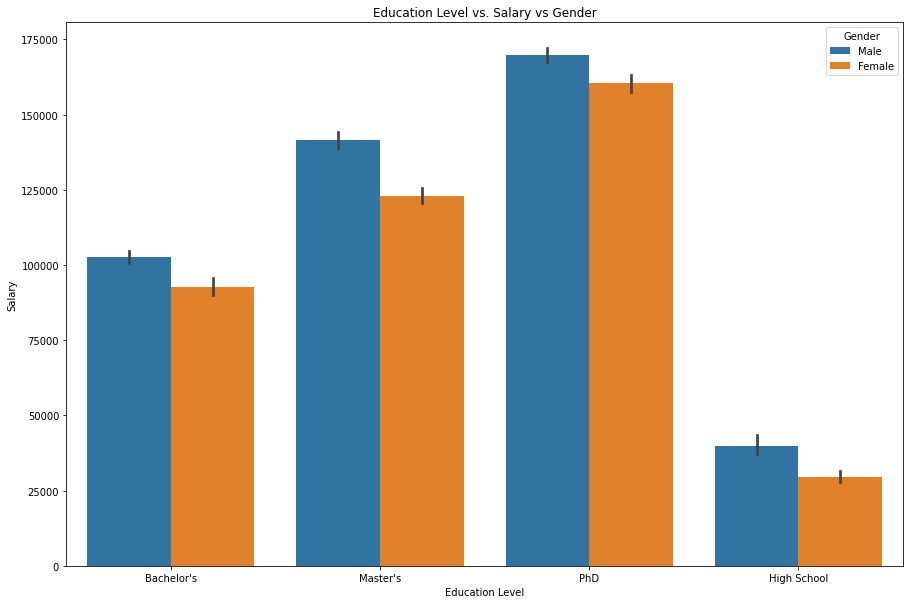

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x='Education Level', y='Salary', data=salary_df, hue='Gender').set(title='Education Level vs. Salary vs Gender')

#Outliers.....

In [46]:
Q1 = salary_df.Salary.quantile(0.25)
Q3 = salary_df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

upper_array = np.where(salary_df['Salary']>=upper)[0]
lower_array = np.where(salary_df['Salary']<=lower)[0]

print(upper_array)


[]


In [47]:
print(lower_array)


[]


In [48]:
topjob_df['z-score'] = topjob_df.groupby('Education Level')['Salary'].transform(ss.zscore)

In [49]:
topjob_df.loc[topjob_df['Salary'].idxmax()]

Age                                 45.0
Gender                              Male
Education Level               Bachelor's
Job Title              Financial Manager
Years of Experience                 21.0
Salary                          250000.0
Encoded_Educ_Level                     1
z-score                         3.402826
Name: 5001, dtype: object

In [50]:
topjob_df.describe()

,Age,Years of Experience,Salary,Encoded_Educ_Level,z-score
count,6103.000000,6103.000000,6103.000000,6103.000000,6.103000e+03
mean,33.700475,8.220629,118688.400623,1.661642,3.725605e-17
std,7.632823,6.025785,52379.531067,0.882687,1.000082e+00
min,21.000000,0.000000,550.000000,0.000000,-4.907628e+00
25%,28.000000,3.000000,70698.500000,1.000000,-6.797458e-01
50%,32.000000,7.000000,120000.000000,2.000000,-1.400227e-01
75%,38.000000,12.000000,162000.000000,2.000000,6.972868e-01
max,62.000000,34.000000,250000.000000,3.000000,7.450382e+00


In [51]:
topjob_df2= topjob_df.drop(5001)

In [52]:
topjob_df2.describe()
#Removing the outlier only reduces the average male salary by $22
#The next highest male salary is only $10,000 away

,Age,Years of Experience,Salary,Encoded_Educ_Level,z-score
count,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000
mean,33.698623,8.218535,118666.881186,1.661750,-0.000558
std,7.632078,6.024058,52356.836194,0.882719,0.999214
min,21.000000,0.000000,550.000000,0.000000,-4.907628
25%,28.000000,3.000000,70547.750000,1.000000,-0.682688
50%,32.000000,7.000000,120000.000000,2.000000,-0.140023
75%,38.000000,12.000000,162000.000000,2.000000,0.697287
max,62.000000,34.000000,240000.000000,3.000000,7.450382


In [53]:
phd_df = salary_df.loc[salary_df['Education Level'] == 'PhD',:]
phd_df.sort_values('Salary')
topjob_df2= topjob_df.drop(2654)

<AxesSubplot: xlabel='Education Level', ylabel='Salary'>

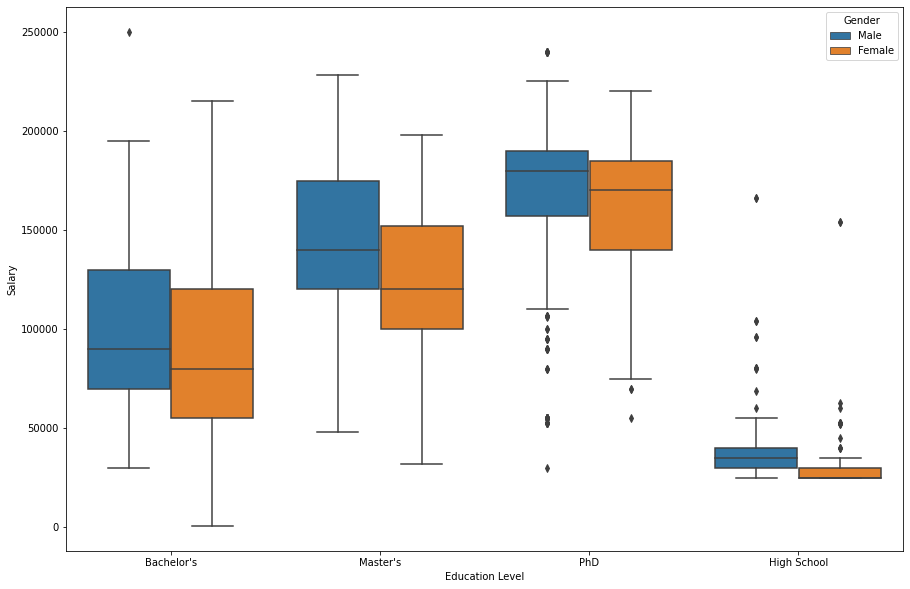

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Education Level', y='Salary', data=topjob_df2, hue = "Gender")
#Removing the highest male salary makes it so that the highest salary earned
#by a Bachelor's degree is now a woman, where it is male in all other
#Education Levels.

In [55]:
pt_topjob_df = topjob_df.pivot_table(topjob_df, columns = "Job Title")
pt_topjob_df

Job Title,Back end Developer,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,Director of HR,Director of Marketing,Financial Manager,Front end Developer,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
Age,30.933884,38.465753,28.685950,36.064018,32.134615,44.473684,39.565217,37.193182,35.014925,28.970711,...,35.833333,36.979167,38.202899,42.474684,37.204082,39.645833,26.904000,28.318533,45.742021,30.528736
Encoded_Educ_Level,1.293388,1.657534,1.209366,2.710817,1.365385,3.000000,2.623188,2.318182,1.335821,1.246862,...,1.952381,2.500000,2.318841,2.354430,3.000000,2.004167,1.056000,1.077220,2.648936,1.356322
Salary,102337.896694,123150.684932,125090.909091,166105.960265,93269.230769,204561.403509,122028.985507,137840.909091,143059.701493,84857.941423,...,90904.761905,109583.333333,126594.202899,166225.487342,137959.183673,151202.333333,64680.000000,113243.243243,172502.167553,66436.781609
Years of Experience,6.049587,10.890411,4.969697,11.143488,7.384615,16.982456,11.724638,12.068182,10.694030,4.167364,...,7.809524,9.937500,11.521739,14.250000,11.714286,13.737500,3.200000,4.449807,16.058511,4.402299
z-score,-0.037589,0.068770,0.432482,0.242642,-0.315438,1.128155,-0.881833,-0.157292,0.783541,-0.503026,...,-0.942626,-1.055893,-0.487187,0.648255,-0.842586,0.525915,-0.811323,0.264056,0.491219,-0.994496


In [56]:
pt_topjob_df2 = topjob_df.pivot_table(topjob_df, index = "Job Title", columns = "Gender").stack()
pt_topjob_df2

Age  Encoded_Educ_Level  \
Job Title                 Gender                                  
Back end Developer        Female  30.523077            1.476923   
                          Male    31.084746            1.225989   
Content Marketing Manager Female  37.142857            1.816327   
                          Male    41.166667            1.333333   
Data Analyst              Female  28.620155            1.372093   
...                                     ...                 ...   
Software Engineer         Male    28.772308            1.030769   
Software Engineer Manager Female  45.620000            2.650000   
                          Male    45.786232            2.648551   
Web Developer             Female  29.615385            1.461538   
                          Male    31.270833            1.270833   

                                         Salary  Years of Experience   z-score  
Job Title                 Gender                                                
Back end Developer        Female   91942.938462             5.553846 -0.416228  
                          Male    106155.254237             6.231638  0.101459  
Content Marketing Manager Female  122244.897959            10.183673 -0.060323  
                          Male    125000.000000            12.333333  0.332336  
Data Analyst              Female  114961.240310             4.558140  0.082532  
...                                         ...                  ...       ...  
Software Engineer         Male    118335.384615             4.772308  0.420165  
Software Engineer Manager Female  171792.900000            18.620000  0.469455  
                          Male    172759.148551            15.130435  0.499104  
Web Developer             Female   61794.871795             3.794872 -1.201274  
                          Male     70208.333333             4.895833 -0.826489  

[84 rows x 5 columns]

# Conclusion
## This data set seems to confirm both a gender gap in STEM fields as well as a salary gap between women and men overall.  
## Because this dataset consists of over 6000 employees across 200 career titles, it seems that the differences are significant and pervasive.  
## However, since this is an observational study and not a controlled experiment, we can at best say there is a correlation and not that gender causes the gap.